In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('cleaned_patient_data.csv')

In [17]:
print(df.describe())

          Patient_ID            Age     Total_Cost  Registration time  \
count  478427.000000  478427.000000  478427.000000      478427.000000   
mean     2999.686002      36.441123     439.838882          32.116227   
std      1154.214135      18.144143     264.812219          59.241356   
min      1000.000000       1.000000       0.942426           0.000000   
25%      2000.000000      23.000000     245.479261          14.300000   
50%      2997.000000      36.000000     389.126956          21.800000   
75%      4000.000000      49.000000     579.103673          30.000000   
max      4999.000000     100.000000    2853.429930         499.000000   

        Nursing time  Laboratory time  Consultation time  Pharmacy time  
count  478427.000000    478427.000000      478427.000000  478427.000000  
mean       36.835301        36.878990          36.782785      36.782231  
std        58.546755        58.512466          58.243245      58.293727  
min         0.000000         0.000000         

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478427 entries, 0 to 478426
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Visit_Date         478427 non-null  object 
 1   Patient_ID         478427 non-null  int64  
 2   Age                478427 non-null  int64  
 3   Gender             478427 non-null  object 
 4   Diagnosis          478427 non-null  object 
 5   Has_Insurance      478427 non-null  object 
 6   Area               478427 non-null  object 
 7   Total_Cost         478427 non-null  float64
 8   Registration time  478427 non-null  float64
 9   Nursing time       478427 non-null  float64
 10  Laboratory time    478427 non-null  float64
 11  Consultation time  478427 non-null  float64
 12  Pharmacy time      478427 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 47.5+ MB
None


In [5]:
#numeric columns
num_cols = ["Total_Cost", "Age", "Registration time", "Nursing time", "Laboratory time", "Consultation time", "Pharmacy time"]

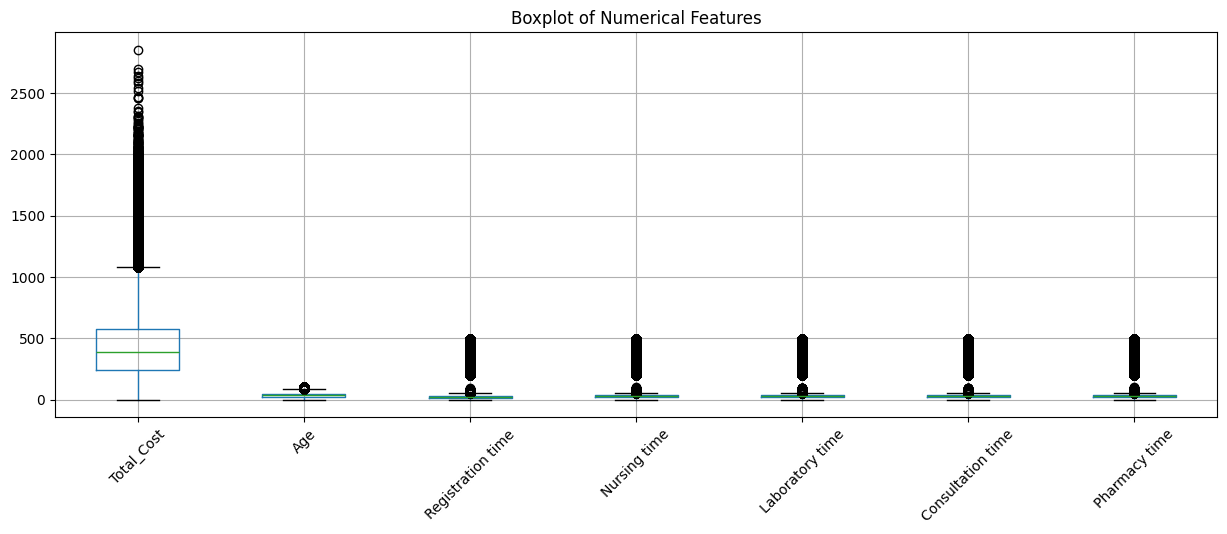

In [6]:
plt.figure(figsize=(15, 5))
df[num_cols].boxplot(rot=45)
plt.title("Boxplot of Numerical Features")
plt.show()

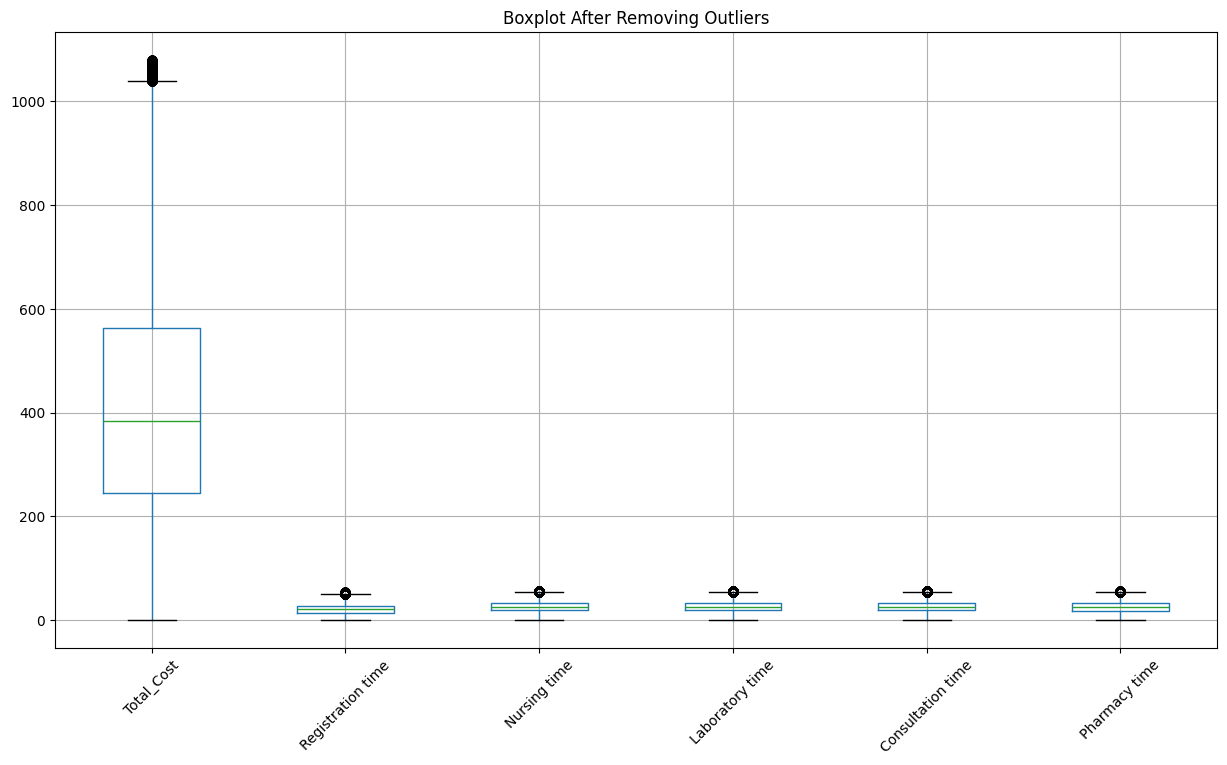

In [7]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in num_cols:
    df = remove_outliers(df, col)

# Visualize after outlier removal
plt.figure(figsize=(15, 8))
df[["Total_Cost", "Registration time", "Nursing time", "Laboratory time", "Consultation time", "Pharmacy time"]].boxplot(rot=45)
plt.title("Boxplot After Removing Outliers")
plt.show()


In [8]:
print(df.describe())

          Patient_ID            Age     Total_Cost  Registration time  \
count  419418.000000  419418.000000  419418.000000      419418.000000   
mean     2999.397017      36.238433     420.677145          21.365743   
std      1153.883681      17.831633     226.641476          10.559646   
min      1000.000000       1.000000       0.942426           0.000000   
25%      2000.000000      23.000000     245.857954          13.800000   
50%      2998.000000      36.000000     384.867905          20.900000   
75%      3999.000000      49.000000     563.058043          28.300000   
max      4999.000000      88.000000    1079.501078          53.500000   

        Nursing time  Laboratory time  Consultation time  Pharmacy time  
count  419418.000000    419418.000000      419418.000000  419418.000000  
mean       26.133592        26.167317          26.116135      26.088412  
std        10.693447        10.673642          10.629701      10.626607  
min         0.000000         0.000000         

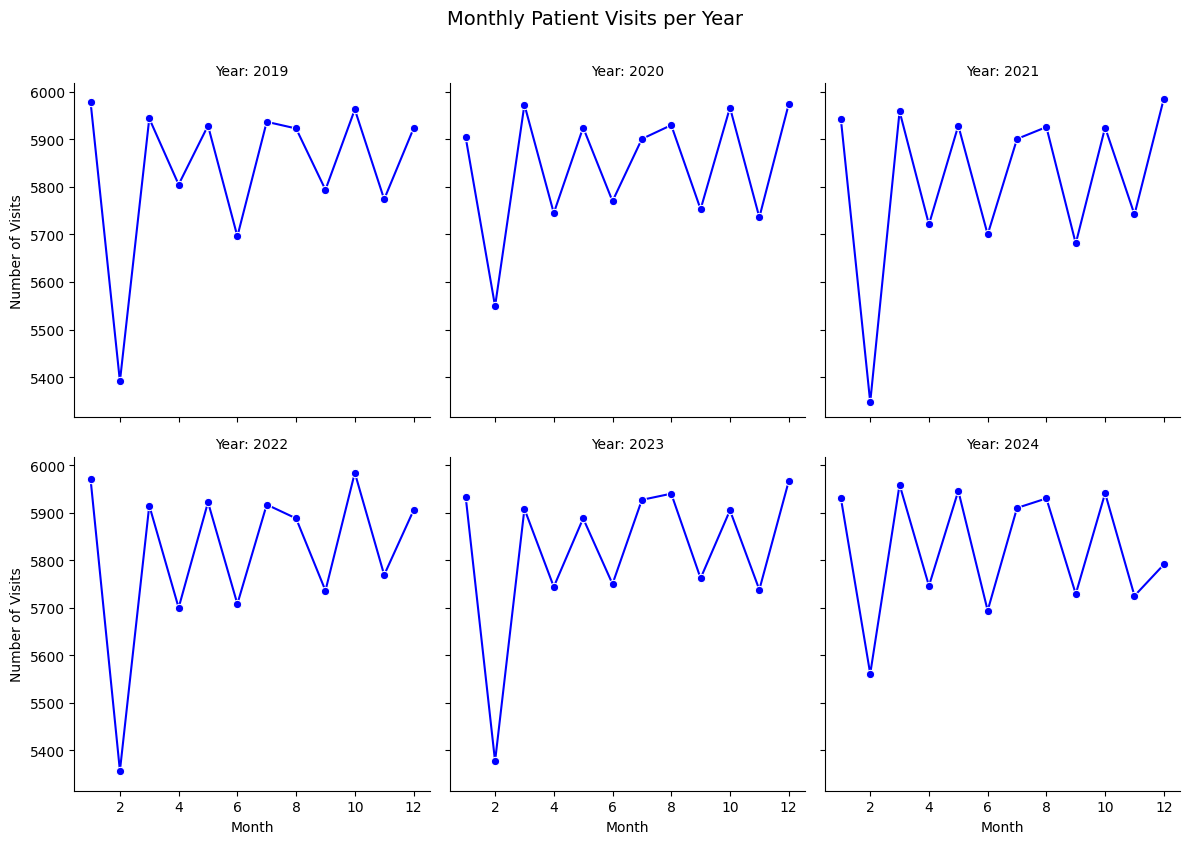

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe for yearly trends
monthly_trends = df.groupby(["Year", "Month"]).size().reset_index(name="Visits")

# Plot using Seaborn
g = sns.FacetGrid(monthly_trends, col="Year", col_wrap=3, height=4, sharey=True)  
g.map(sns.lineplot, "Month", "Visits", marker="o", color="b")  

# Adjustments
g.set_axis_labels("Month", "Number of Visits")
g.set_titles("Year: {col_name}")
plt.suptitle("Monthly Patient Visits per Year", fontsize=14, y=1.05)
plt.show()


<Axes: title={'center': 'Top 10 Diagnoses'}, xlabel='Diagnosis'>

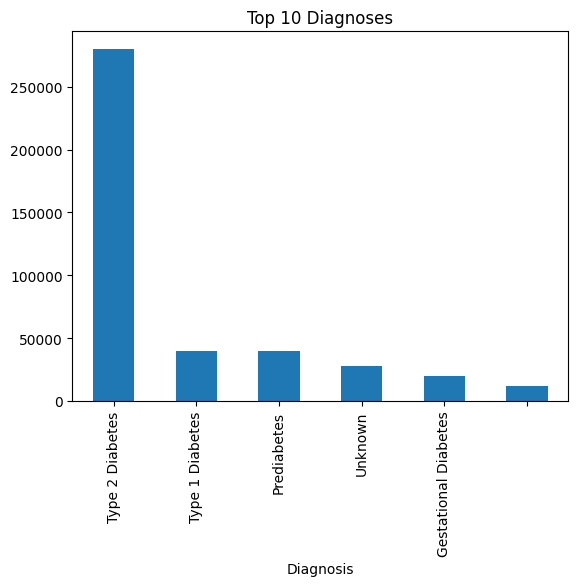

In [11]:
df["Diagnosis"].value_counts().head(10).plot(kind="bar", title="Top 10 Diagnoses")

In [12]:
df.Diagnosis.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
478420    False
478421    False
478423    False
478424    False
478425    False
Name: Diagnosis, Length: 419418, dtype: bool

<Axes: title={'center': 'Patient Age Distribution'}, xlabel='Age_Group'>

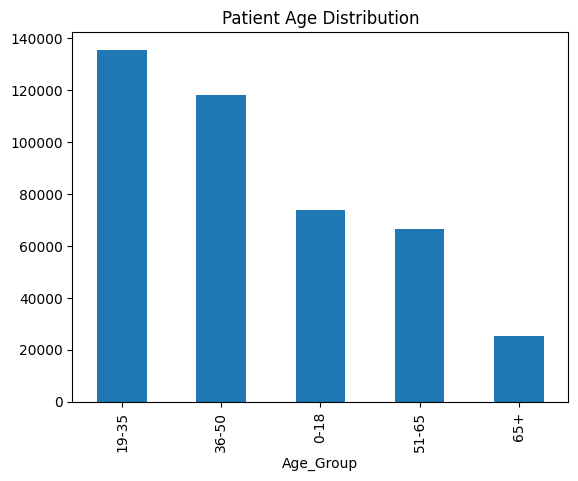

In [13]:
df["Age_Group"] = pd.cut(df["Age"], bins=[0, 18, 35, 50, 65, 100], labels=["0-18", "19-35", "36-50", "51-65", "65+"])
df["Age_Group"].value_counts().plot(kind="bar", title="Patient Age Distribution")

<Axes: title={'center': 'Avg. Cost: Insured vs. Uninsured'}, xlabel='Has_Insurance'>

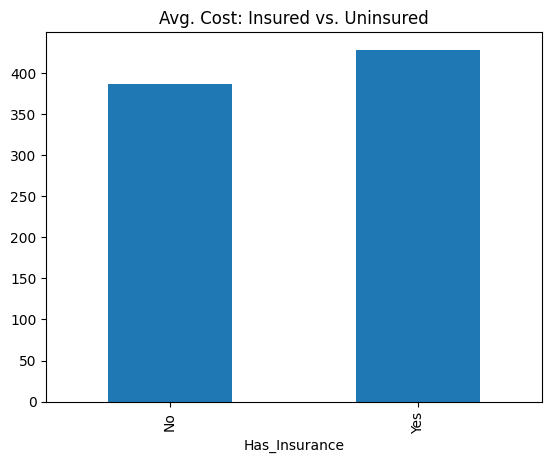

In [14]:
df.groupby("Has_Insurance")["Total_Cost"].mean().plot(kind="bar", title="Avg. Cost: Insured vs. Uninsured")

<Axes: title={'center': 'Avg. Time Spent in Each Department'}>

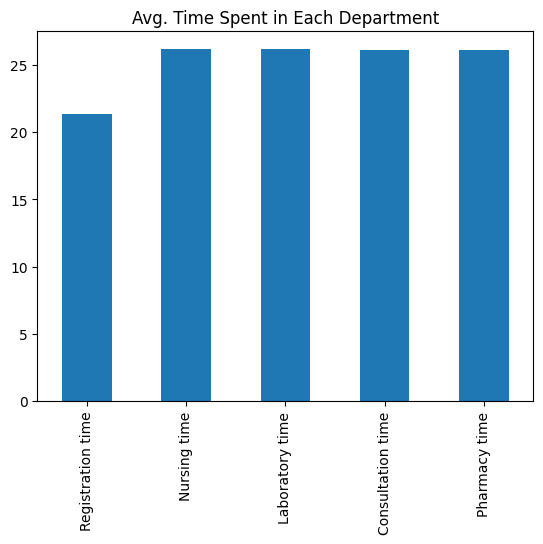

In [15]:
time_cols = ["Registration time", "Nursing time", "Laboratory time", "Consultation time", "Pharmacy time"]
df[time_cols].mean().plot(kind="bar", title="Avg. Time Spent in Each Department")